# $\beta$-VAE trained on the Fashion-MNIST dataset

In this project I have trained a basic VAE built on a CNN-architecture to learn the distribution of the Fashion-MNIST dataset and then be able to generate samples from it.

The frist step is to load in the data, and then visulize a few datapoints as an exmple of how the dataset is distributed.
To run file it is needed to download the Fashion-MNIST dataset which is easily done with torchvision.

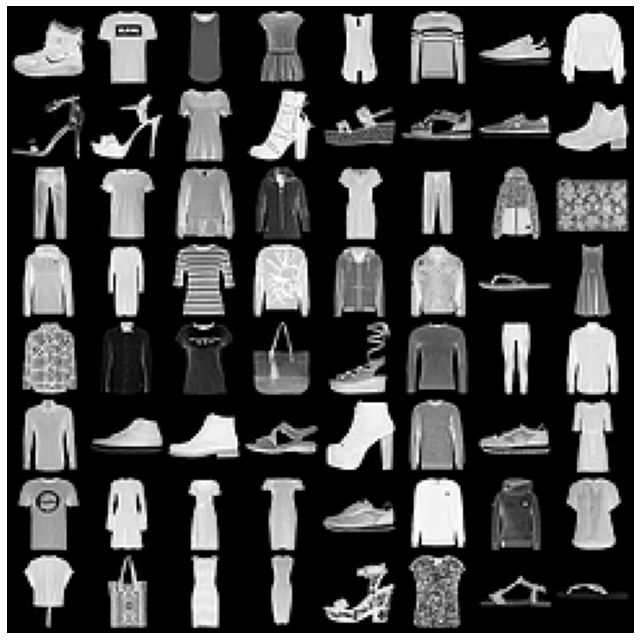

In [1]:
# Standard imports
import pandas as pd; 
import numpy as np
import matplotlib.pyplot as plt
import scipy

plt.style.use('ggplot')

# Pytorch
import torch
import torchvision
from torchvision import datasets, transforms

# Project specifik modules



transform_ = transforms.Compose([transforms.ToTensor()])


#We define the label names for alter if we want to know what kind of cloethes we are actually generating.
label_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


trainset = datasets.FashionMNIST(root = "\FMNIST",
                                 train=True,
                                 transform = transform_,
                                 download=True)

testset = datasets.FashionMNIST(root = "\FMNIST",
                                train=False,
                                transform = transform_,
                                download=True)


batch_size = 64
train_loader = torch.utils.data.DataLoader(trainset, 
                                           batch_size=batch_size)

test_loader = torch.utils.data.DataLoader(testset, 
                                          batch_size=batch_size)


_, (X_train, y_train) = next(enumerate(train_loader))

image_grid = torchvision.utils.make_grid(X_train[0:64], nrow=8)

fig, ax = plt.subplots(figsize=(9, 9))
ax.imshow(image_grid.permute(1, 2, 0), aspect = 'auto', cmap = 'viridis')
plt.axis('off')
plt.tight_layout()

In [2]:
from models import BetaVAE
m = BetaVAE(1, 100)

In [3]:
m.test_encoder_decoder(X_train)
X = m.forward(X_train)
X[0]

torch.Size([64, 1, 28, 28])
torch.Size([64, 64, 4, 4]) 4
torch.Size([64, 1, 28, 28])


tensor([[[[-0.2309,  0.0405, -0.1617,  ..., -0.0133,  0.1077, -0.0319],
          [-0.0983, -0.2558, -0.4326,  ..., -0.3421, -0.0370,  0.0227],
          [ 0.0294, -0.0361, -0.1397,  ...,  0.2701,  0.2128,  0.1958],
          ...,
          [-0.3571, -0.2782, -0.2207,  ..., -0.3294, -0.1742, -0.1641],
          [ 0.1682, -0.1249, -0.1953,  ...,  0.0620, -0.0934, -0.3181],
          [-0.0887, -0.3997, -0.1404,  ...,  0.0017,  0.1276, -0.1219]]],


        [[[-0.3047, -0.0759, -0.0227,  ...,  0.2389, -0.0166, -0.1071],
          [-0.5041, -0.5710, -0.2767,  ..., -0.2373, -0.0850,  0.0467],
          [ 0.4607, -0.0642, -0.4658,  ..., -0.0922, -0.5068, -0.2805],
          ...,
          [-0.4373, -0.5120, -0.5495,  ..., -0.0631, -0.3836,  0.0521],
          [ 0.2138, -0.2520, -0.2776,  ..., -0.0928, -0.3639, -0.1408],
          [-0.2909, -0.2155, -0.2186,  ..., -0.0226, -0.1109,  0.0198]]],


        [[[ 0.0743, -0.2968, -0.5108,  ...,  0.1737,  0.0999,  0.1174],
          [-0.0458, -0.323